# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD

In [2]:
#separating byte files and asm files 

source = 'asmFiles'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move(source +"/"+ file,destination)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


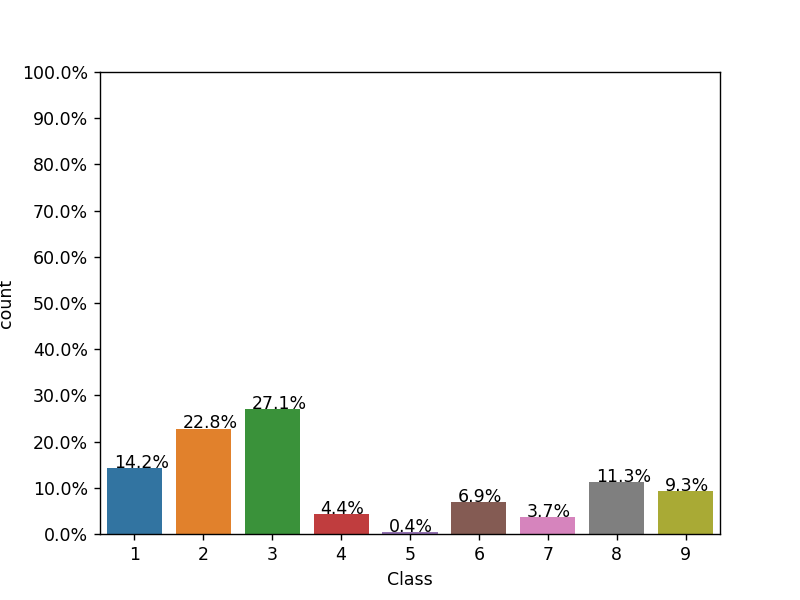

In [2]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [3]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.234863      9
1  01IsoiSMh5gxyDYTl4CB  5.538818      2
2  01jsnpXSAlgw6aPeDxrU  3.887939      9
3  01kcPWA9K2BOxQeS5Rju  0.574219      1
4  01SuzwMJEIXsK7A8dQbl  0.370850      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


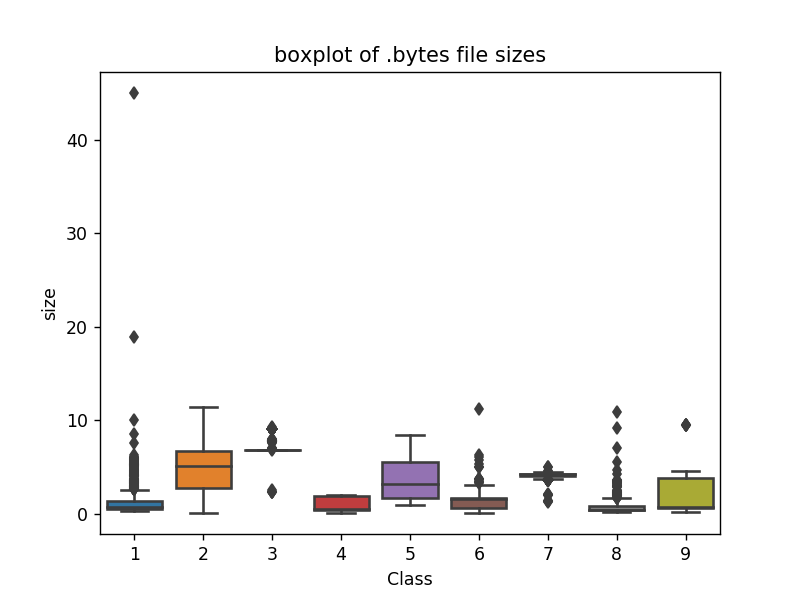

In [4]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [10]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file,"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file)
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [5]:
byte_features=pd.read_csv("result.csv")
print (byte_features.head())

                         ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5.txt  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB.txt   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU.txt   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju.txt   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl.txt   19764   710   302   433   559   410   262   249   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff     ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753   1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902   8588  
2  9107  ...  2325  2358  2242  2885  2863  2471  2786   2680  49144    468  
3  1078  ...   478   873   485   462   516  1133   471    761   7998  13940  
4   422  ...   847   947   350   209   239   653   221    242   2199   9008  

[5 rows x 258 columns]


In [6]:
byte_features["ID"] = byte_features["ID"].apply(lambda x: x.split(".")[0])

In [7]:
result = pd.merge(byte_features, data_size_byte,on='ID', how='left')
result.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824  4.234863   
1  9291  ...   439   281   302  7639   518  17001  54902   8588  5.538818   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468  3.887939   
3  1078  ...   485   462   516  1133   471    761   7998  13940  0.574219   
4   422  ...   350   209   239   653   221    242   2199   9008  0.370850   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

<h3> Bi-Gram Feature for Bytes files </h3>

In [8]:
hex_codes = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff".upper()

In [9]:

hex_codes = hex_codes.split(',')
print(len(hex_codes))

256


In [10]:
# bigram list
cnt = 1
bi_gram = dict()
for i in range(len(hex_codes)):
    for j in range(len(hex_codes)):
        bi_gram.setdefault((hex_codes[i],hex_codes[j]),cnt)
        cnt += 1
print(cnt)
print(len(bi_gram))


bi_gram_ix_word = dict()
for k,v in bi_gram.items():
    bi_gram_ix_word[v] = k
    
bi_gram_word_ix = dict()

for k,v in bi_gram_ix_word.items():
    bi_gram_word_ix[v] = k
    
print(len(bi_gram_word_ix))

65537
65536
65536


In [14]:
from itertools import tee, islice
from collections import Counter

def ngrams(lst, n):
    tlst = lst
    while True:
        a, b = tee(tlst)
        l = tuple(islice(a, n))
        if len(l) == n:
            yield l
            next(b)
            tlst = b
        else:
            break

In [62]:
import os
import numpy as np
files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),len(bi_gram)),dtype=int)
print(feature_matrix.shape)

(10869, 65536)


**This took approx. 6 hours to complete.**

In [ ]:
import numpy as np
bi_feature_matrix = np.zeros((len(files),len(bi_gram)),dtype=int)

files = os.listdir('byteFiles')

In [ ]:
file_name = dict()
byte_feature_file=open('bi_gram.csv','w+')
for idx,file in enumerate(files):
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        cnt = Counter(ngrams(open("byteFiles/" + file).read().split(),2))
        file_name[file] = idx    
        for i in cnt:
            try:
                bi_feature_matrix[idx,bi_gram[i]] += 1
            except:
                bi_feature_matrix[idx,0] += 1
                
    if idx%100 == 0:
        print("Completed processing of ",idx)
                

In [11]:
# files calculated seperately

from pickle import dump,load
with open("bi_feature_matrix.pkl","rb") as f:
    bi_feature_matrix = load(f)
    
with open("bytes_files_dict.pkl","rb") as f:
    bytes_files_dict = load(f)

In [12]:
print("Sparcity of matrix is ",np.count_nonzero(bi_feature_matrix)/(bi_feature_matrix.shape[0] * bi_feature_matrix.shape[1]))

Sparcity of matrix is  0.7049084911790413


In [13]:
# column names for bi_gram features.
bi_gram_columns = [bi_gram_ix_word[i] if i in bi_gram_ix_word else ("??","??",) for i in range(bi_feature_matrix.shape[1])]

In [14]:
# creaing bi_gram dataframe
bi_gram_csv = pd.DataFrame(data = bi_feature_matrix,columns=bi_gram_columns)
print(bi_gram_csv.shape)

(10869, 65536)


In [15]:
# ading file name feature to dataframe.
bi_gram_csv["ID"] = [bytes_files_dict[i].split(".")[0] if i in bytes_files_dict else "NA" for i in bi_gram_csv.index.values]

In [16]:
bi_gram_csv.head()

(??, ??)  (00, 00)  (00, 01)  (00, 02)  (00, 03)  (00, 04)  (00, 05)  \
0      2705    274425      1269      1029      1469      1227      1144   
1     13456     21075       752        73        48       175        12   
2      2835     16798       596       159       144       513       595   
3     15310     10417       225        61        69       114        40   
4      9091     16271        62        22       126         9        11   

   (00, 06)  (00, 07)  (00, 08)  ...  (FF, F6)  (FF, F7)  (FF, F8)  (FF, F9)  \
0      1437      1263      1174  ...        10        10         9         7   
1        10        11        42  ...        35        68        23        72   
2       557       146       528  ...       118        73        82        81   
3        25        22        63  ...        20        10        59         9   
4         3         5        11  ...        74       202       150        29   

   (FF, FA)  (FF, FB)  (FF, FC)  (FF, FD)  (FF, FE)                    ID  
0         5         7        11         9         6  01azqd4InC7m9JpocGv5  
1        46        65        15       101       125  01IsoiSMh5gxyDYTl4CB  
2       108       118        66        97        84  01jsnpXSAlgw6aPeDxrU  
3        15        18        91        27        65  01kcPWA9K2BOxQeS5Rju  
4         2         1         0         4         3  01SuzwMJEIXsK7A8dQbl  

[5 rows x 65537 columns]

In [17]:
# merge with result.csv
final = pd.merge(bi_gram_csv, result,on='ID')
final.head()


(??, ??)  (00, 00)  (00, 01)  (00, 02)  (00, 03)  (00, 04)  (00, 05)  \
0      2705    274425      1269      1029      1469      1227      1144   
1     13456     21075       752        73        48       175        12   
2      2835     16798       596       159       144       513       595   
3     15310     10417       225        61        69       114        40   
4      9091     16271        62        22       126         9        11   

   (00, 06)  (00, 07)  (00, 08)  ...    f9    fa    fb    fc    fd     fe  \
0      1437      1263      1174  ...  3101  3211  3097  2758  3099   2759   
1        10        11        42  ...   439   281   302  7639   518  17001   
2       557       146       528  ...  2242  2885  2863  2471  2786   2680   
3        25        22        63  ...   485   462   516  1133   471    761   
4         3         5        11  ...   350   209   239   653   221    242   

      ff     ??      size  Class  
0   5753   1824  4.234863      9  
1  54902   8588  5.538818      2  
2  49144    468  3.887939      9  
3   7998  13940  0.574219      1  
4   2199   9008  0.370850      8  

[5 rows x 65796 columns]

In [18]:
# save the file for future use 

with open("final_bytes.pkl","wb") as f:
    dump(final,f)

In [19]:
bi_gram_word_ix[("??", "??")] = 0

final = final.rename(columns=bi_gram_word_ix)
final.head()

0       1     2     3     4     5     6     7     8     9  ...    f9  \
0   2705  274425  1269  1029  1469  1227  1144  1437  1263  1174  ...  3101   
1  13456   21075   752    73    48   175    12    10    11    42  ...   439   
2   2835   16798   596   159   144   513   595   557   146   528  ...  2242   
3  15310   10417   225    61    69   114    40    25    22    63  ...   485   
4   9091   16271    62    22   126     9    11     3     5    11  ...   350   

     fa    fb    fc    fd     fe     ff     ??      size  Class  
0  3211  3097  2758  3099   2759   5753   1824  4.234863      9  
1   281   302  7639   518  17001  54902   8588  5.538818      2  
2  2885  2863  2471  2786   2680  49144    468  3.887939      9  
3   462   516  1133   471    761   7998  13940  0.574219      1  
4   209   239   653   221    242   2199   9008  0.370850      8  

[5 rows x 65796 columns]

<h2>4.1. Machine Leaning Models on bytes files</h2>

**Distribution of class in Train/Test and cv**

<IPython.core.display.Javascript object>


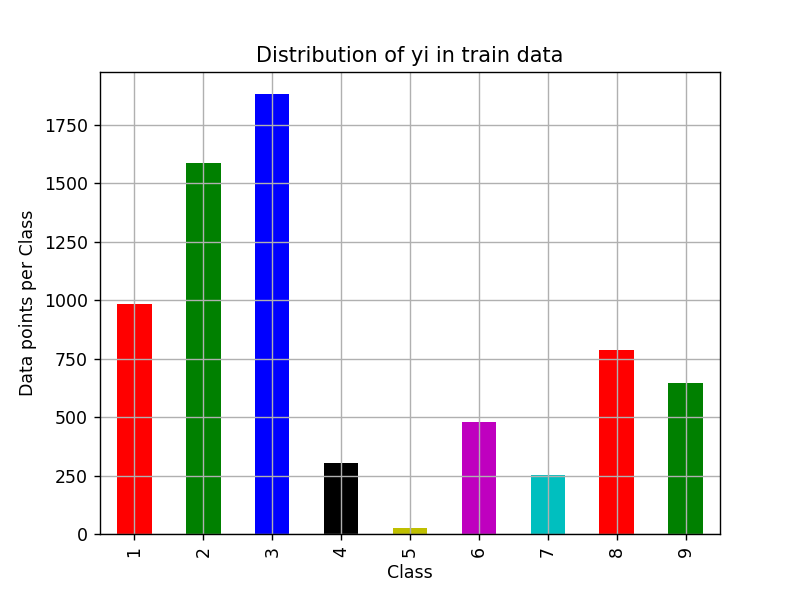

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


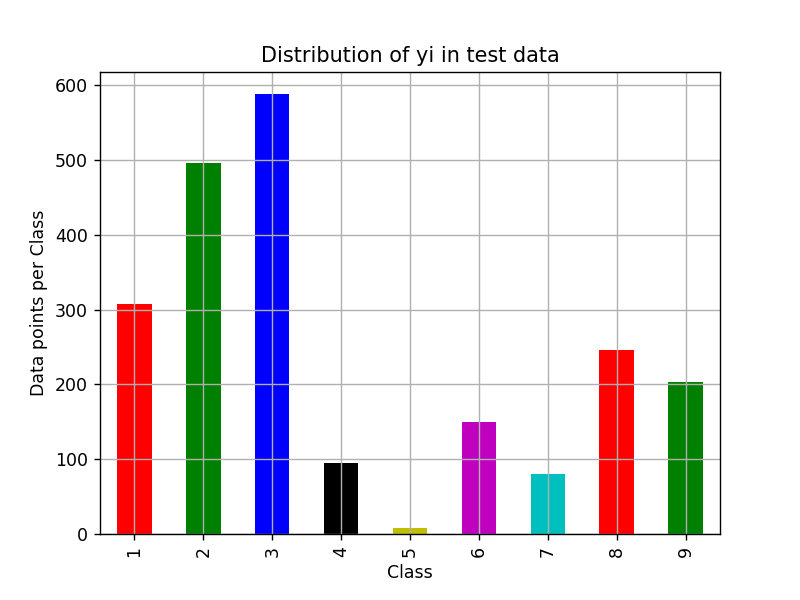

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


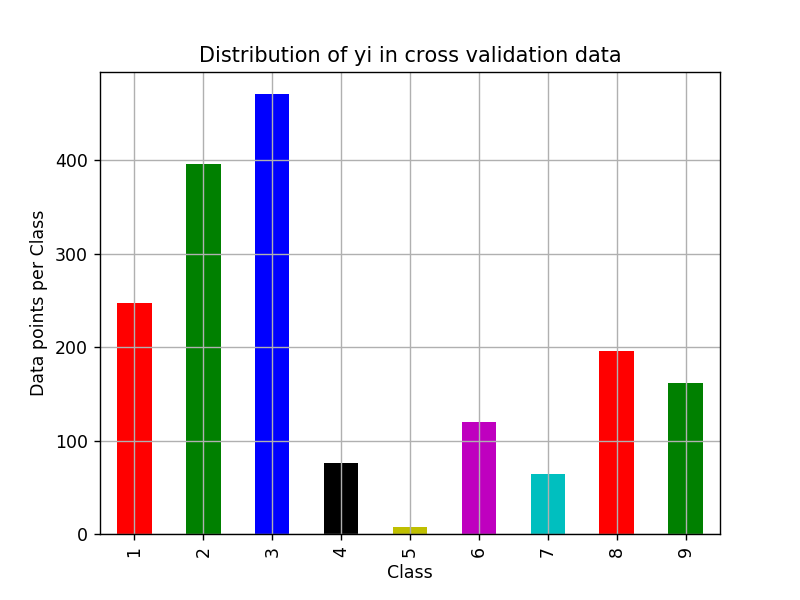

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [88]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h3> Train Test Split </h3>

In [29]:
data_y = final["Class"]
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(final.drop(["ID","Class"],axis = 1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [30]:
print("Shape of trian is ",X_train.shape)
print("Shape of trian is ",X_test.shape)
print("Shape of trian is ",X_cv.shape)

Shape of trian is  (6955, 65794)
Shape of trian is  (2174, 65794)
Shape of trian is  (1739, 65794)


###  SVD ( bi_gram)

* We are considering top 2000 features.
* The reason is that to run on one parameter it is taking around **5-6 hours.**. Just for one value of KNN it took around 5 hours on my machine. And Google colab was getting crashed due to insufficient ram.


In [31]:
X_train_bi_gram = X_train[list(range(len(bi_gram_ix_word)))]
X_cv_bi_gram = X_cv[list(range(len(bi_gram_ix_word)))]
X_test_bi_gram = X_test[list(range(len(bi_gram_ix_word)))]

In [32]:
print("Final shape of train is ",X_train_bi_gram.shape)
print("Final shape of cv is ",X_cv_bi_gram.shape)
print("Final shape of test is ",X_test_bi_gram.shape)

Final shape of train is  (6955, 65536)
Final shape of cv is  (1739, 65536)
Final shape of test is  (2174, 65536)


**Normalization**

In [33]:
# fitting on train data to avoid data leakage problem

min_max_scaler = preprocessing.MinMaxScaler()
# fit transform on train 
X_train_bi_gram = min_max_scaler.fit_transform(X_train_bi_gram)

# transform on test
X_test_bi_gram = min_max_scaler.transform(X_test_bi_gram)
X_cv_bi_gram = min_max_scaler.transform(X_cv_bi_gram)


C:\Users\rdbz3b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
print(X_train_bi_gram.shape)

(6955, 65536)


**Truncated SVD**

Completed for  0
Completed for  1000
Completed for  2000
Completed for  3000
Completed for  4000
Completed for  5000


<IPython.core.display.Javascript object>


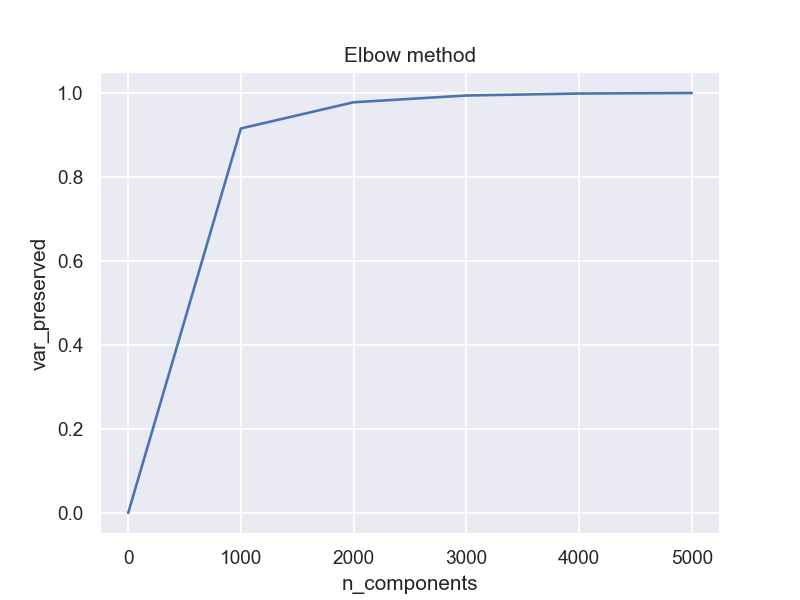

In [51]:
n_comp = list(range(0,6000,1000))
var_preserved = []
for i in n_comp:
    tsvd = TruncatedSVD(n_components=i)
    tsvd.fit(X_train)
    var_preserved.append(tsvd.explained_variance_ratio_.sum())
    print("Completed for ",i)

sns.set()
plt.plot(n_comp,var_preserved)
plt.ylabel("var_preserved")
plt.xlabel("n_components")
plt.title("Elbow method")
plt.show()

* From above we can see, **2000 components** preserve almost **99% of variance**

In [35]:
tsvd = TruncatedSVD(n_components=2000)
X_train_bi_gram = tsvd.fit_transform(X_train_bi_gram)
X_test_bi_gram = tsvd.transform(X_test_bi_gram)
X_cv_bi_gram = tsvd.transform(X_cv_bi_gram)

In [36]:
print("Shape of bi_gram train is ",X_train_bi_gram.shape)
print("Shape of bi_gram test is ",X_test_bi_gram.shape)
print("Shape of bi_gram train is ",X_cv_bi_gram.shape)

Shape of bi_gram train is  (6955, 2000)
Shape of bi_gram test is  (2174, 2000)
Shape of bi_gram train is  (1739, 2000)


In [37]:
train_uni = X_train.iloc[:,-256:]
test_uni = X_test.iloc[:,-256:]
cv_uni = X_cv.iloc[:,-256:]

In [38]:
min_max_scaler = preprocessing.MinMaxScaler()
# fit transform on train 
train_uni = min_max_scaler.fit_transform(train_uni)

# transform on test
test_uni = min_max_scaler.transform(test_uni)
cv_uni = min_max_scaler.transform(cv_uni)


C:\Users\rdbz3b\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
X_train = np.concatenate((train_uni,X_train_bi_gram),axis = 1)
X_test = np.concatenate((test_uni,X_test_bi_gram),axis = 1)
X_cv = np.concatenate((cv_uni,X_cv_bi_gram),axis = 1)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(6955, 2256)
(2174, 2256)
(1739, 2256)


<h3> Multivariate Analysis on final fearure </h3>

<IPython.core.display.Javascript object>


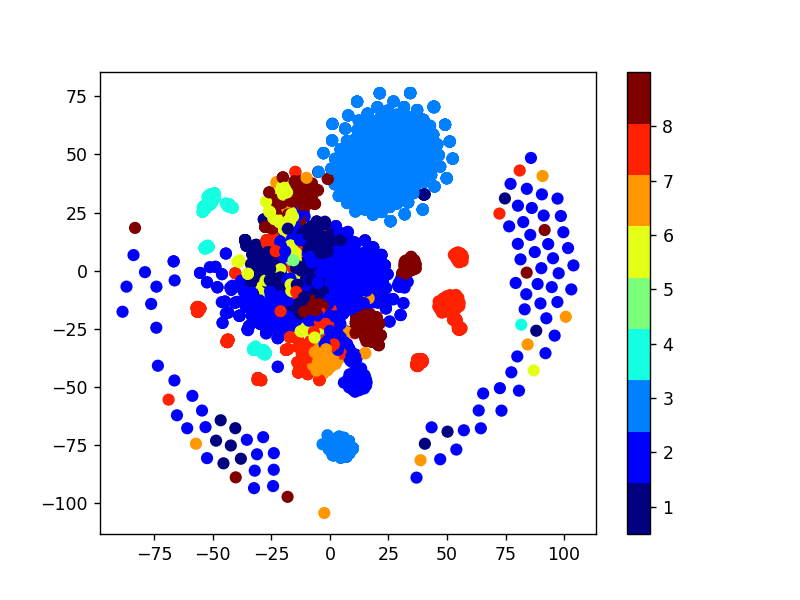

In [42]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(X_train[:5000,:])
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_train[:5000], cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> Random Model </h3>

Log loss on Cross Validation Data using Random Model 2.455429836850771
Log loss on Test Data using Random Model 2.5004147191142936
Number of misclassified points  90.29438822447102
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


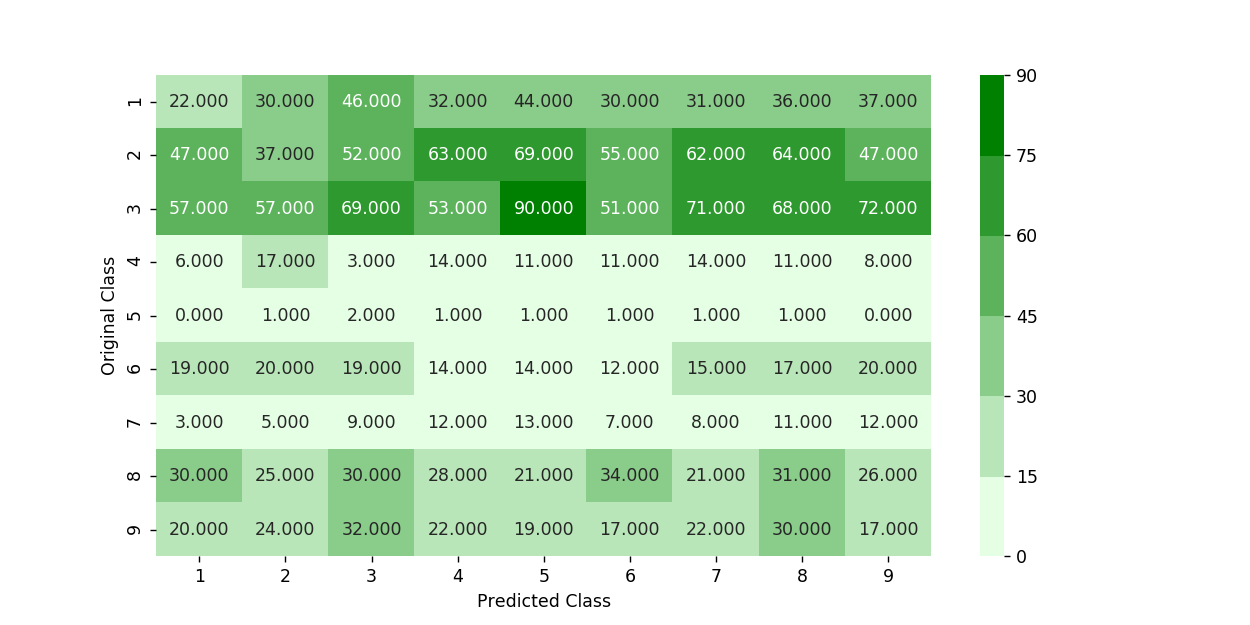

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


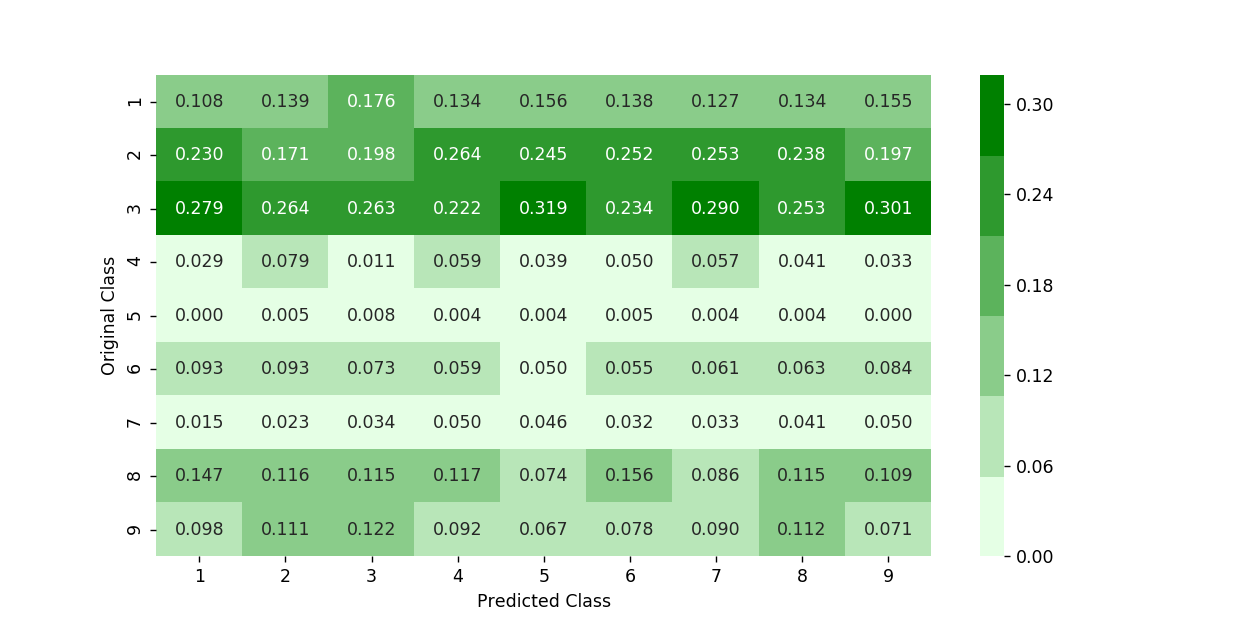

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


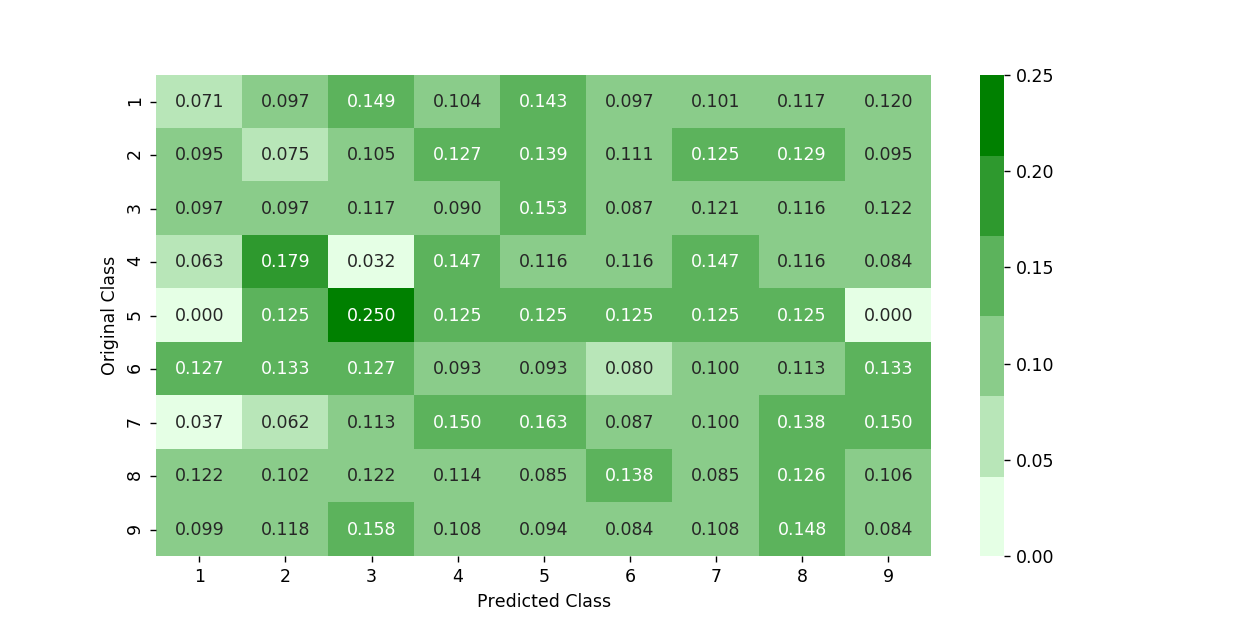

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [163]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3> 4.1.1 K-Nearest Neigbors </h3>

In [165]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 3)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    print("Completed for ",i)
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
print("Best alpha is ",alpha[best_alpha])
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

Completed for  1
Completed for  4
Completed for  7
Completed for  10
Completed for  13
log_loss for k =  1 is 0.34953603877998773
log_loss for k =  4 is 0.2959084311626444
log_loss for k =  7 is 0.30568037134303133
log_loss for k =  10 is 0.32822644772476095
log_loss for k =  13 is 0.3483174547789688
Best alpha is  4


<IPython.core.display.Javascript object>

For values of best alpha =  4 The train log loss is: 0.1820106855863358
For values of best alpha =  4 The cross validation log loss is: 0.2959084311626444
For values of best alpha =  4 The test log loss is: 0.3010964315902819
Number of misclassified points  8.27966881324747
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


<h3> 4.1.2 Logistic Regression </h3>

In [166]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-2,4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    print("Completed for ",i)
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
print("Best alpha is ",alpha[best_alpha])
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

Completed for  0.01
Completed for  0.1
Completed for  1
Completed for  10
Completed for  100
Completed for  1000
log_loss for c =  0.01 is 0.903205719518297
log_loss for c =  0.1 is 0.6372788114056004
log_loss for c =  1 is 0.562208605258729
log_loss for c =  10 is 0.6306667693509269
log_loss for c =  100 is 0.7176272895018144
log_loss for c =  1000 is 0.8035436628120401
Best alpha is  1


<IPython.core.display.Javascript object>

log loss for train data 0.1324389599377947
log loss for cv data 0.562208605258729
log loss for test data 0.6120006630494662
Number of misclassified points  9.06163753449862
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


<h3> 4.1.3 Random Forest Classifier </h3>

Completed for  50
Completed for  100
Completed for  200
Completed for  500
Completed for  700
log_loss for c =  50 is 0.0930487797398476
log_loss for c =  100 is 0.08985680330052284
log_loss for c =  200 is 0.08946991552020493
log_loss for c =  500 is 0.08973890185311155
log_loss for c =  700 is 0.08990146004227512
Best alpha is  200


<IPython.core.display.Javascript object>

For values of best alpha =  200 The train log loss is: 0.03155898438057722
For values of best alpha =  200 The cross validation log loss is: 0.08946991552020493
For values of best alpha =  200 The test log loss is: 0.08197866894026413
Number of misclassified points  1.8859245630174795
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


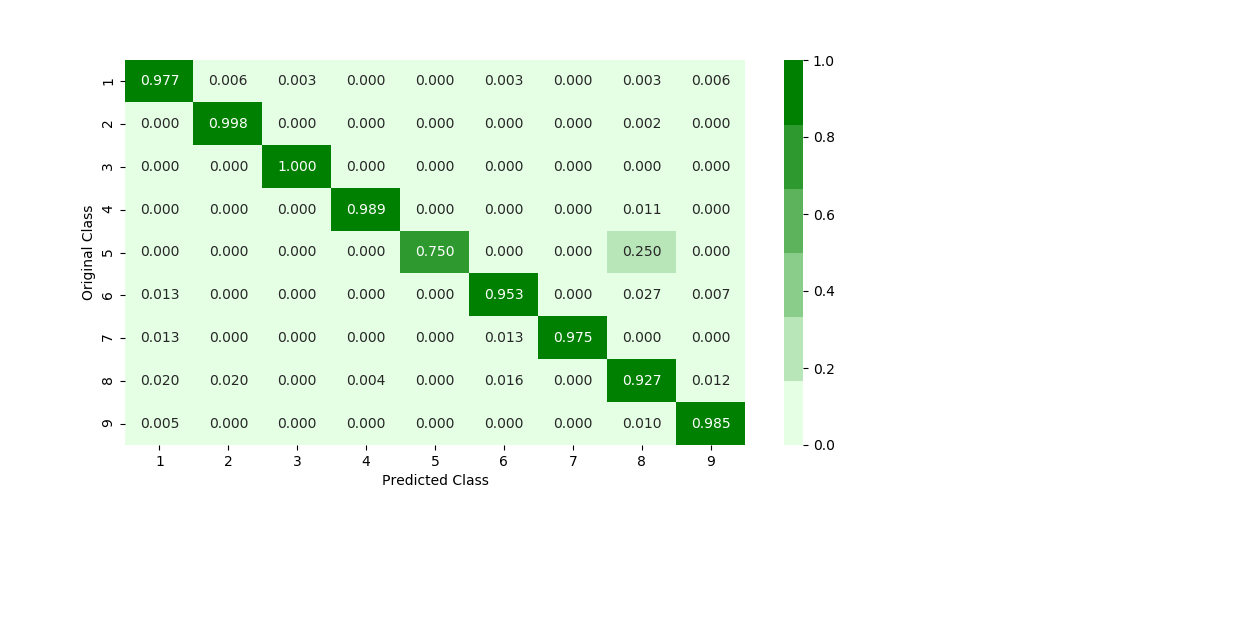

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [167]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[50,100,200,500,700]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))
    print("Completed for ",i)

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)
print("Best alpha is ",alpha[best_alpha])

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4 XgBoost Classifier</h3>

log_loss for c =  50 is 0.10299148381200139
log_loss for c =  100 is 0.07465117642470727
log_loss for c =  250 is 0.0690279325828252
log_loss for c =  500 is 0.06868475425973095
Best alpha is  500


<IPython.core.display.Javascript object>


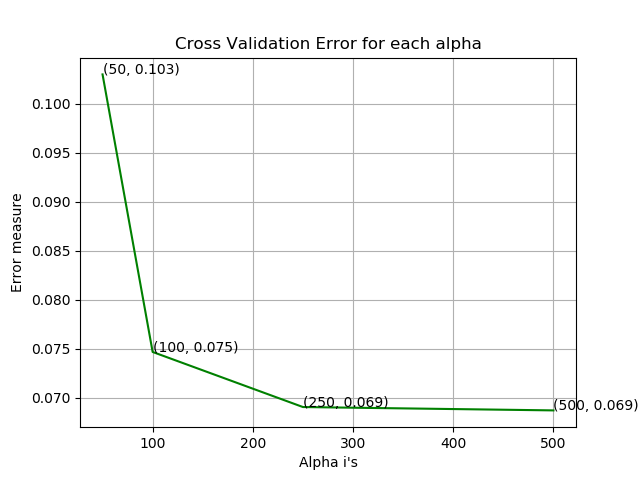

For values of best alpha =  500 The train log loss is: 0.02342996394070474
For values of best alpha =  500 The cross validation log loss is: 0.06868475425973095
For values of best alpha =  500 The test log loss is: 0.0615333897957536
Number of misclassified points  1.1959521619135236
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


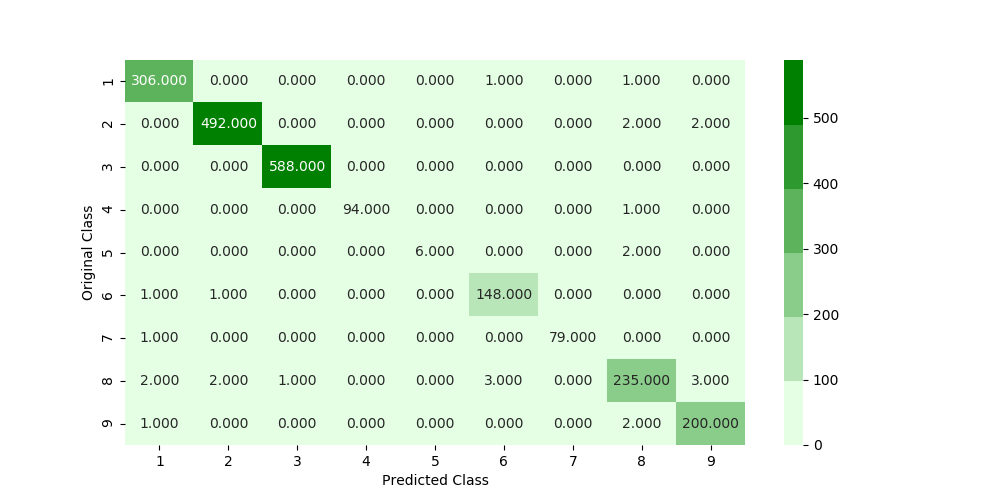

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


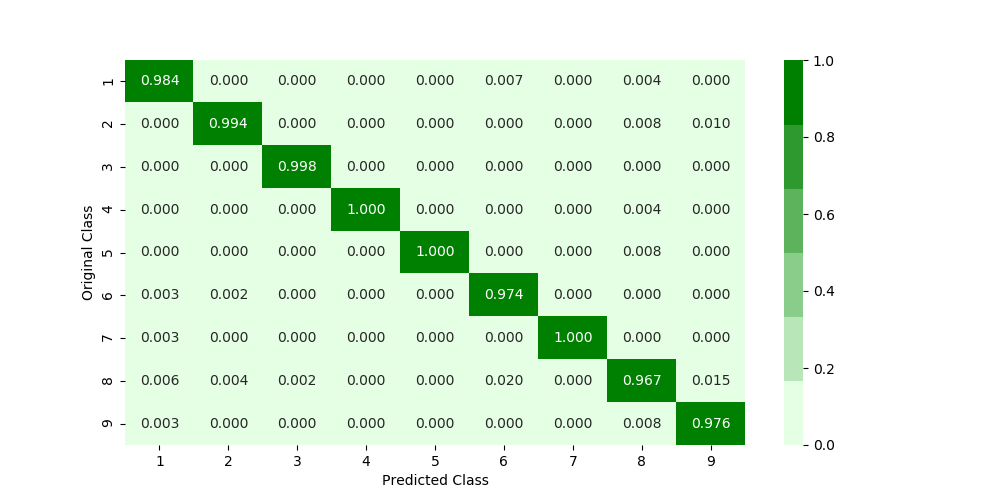

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


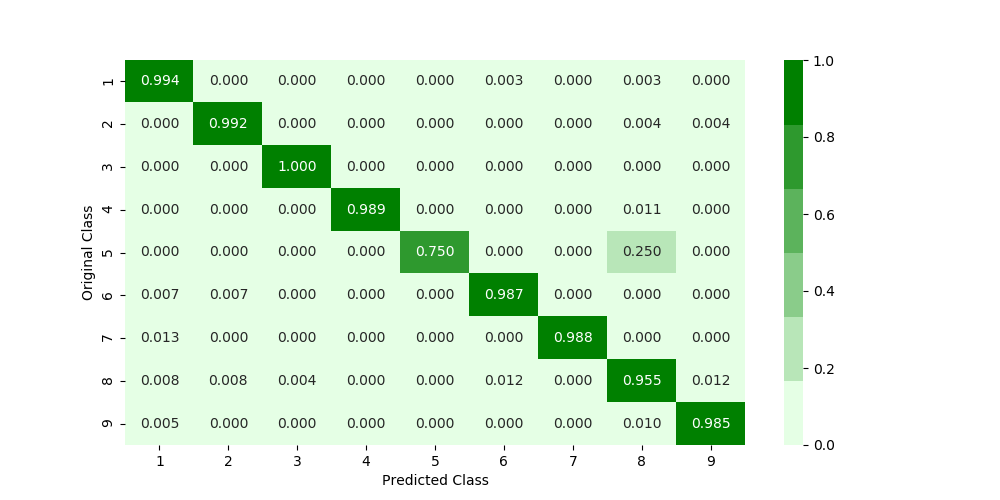

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [170]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[50,100,250,500]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print("Completed for ",i)

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)
print("Best alpha is ",alpha[best_alpha])

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> Observations </h3>

* XGBOOST gave the best result among all the models.
* For bi-gram, out of 65k features scd showed that 2k features carries over 95% of variance.
* Best result was obtained in case of  XGBOOST with **0.031** train loss and **0.089** test loss
* No overfitting in data was observed

## ASM File Feature

In [171]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [172]:
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

**Files sizes of each .asm file**

In [173]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


**Distribution of .asm file sizes**

<IPython.core.display.Javascript object>


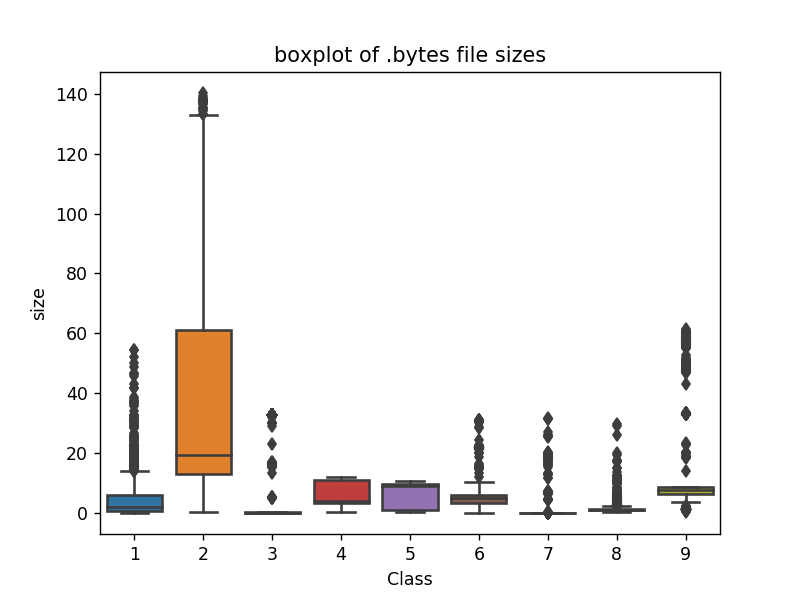

In [26]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [174]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [175]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

### N-Gram For ASM

In [176]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [177]:
asm_bigram = []
def asmopcodebigram():
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            asm_bigram.append(v + ' ' + opcodes[j])

asmopcodebigram()
len(asm_bigram)

676

In [178]:
asm_trigram = []
def asmopcodetrigram():
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                asm_trigram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k])
                
asmopcodetrigram()
len(asm_trigram)

17576

In [179]:
asm_4gram = []
def asmopcodefourgram():
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                for l in range(0, len(opcodes)):
                    asm_4gram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k] + ' ' + opcodes[l])
                                                                                             
asmopcodefourgram()
len(asm_4gram)                                                                                             

456976

In [44]:
def opcode_collect():
    op_file = open("opcode_file.txt", "w+")
    cnt = 0
    for asmfile in (os.listdir('asmFiles')):
        cnt += 1
        opcode_str = ""
        with codecs.open('asmFiles/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
        if (cnt % 100 == 0):
            print("Completed for ",cnt)
    op_file.close()

In [183]:
# for bi_gram
from sklearn.feature_extraction.text import CountVectorizer
import scipy
from tqdm import tqdm

vect = CountVectorizer(ngram_range=(2, 2), vocabulary = asm_bigram)
bigram_vect = scipy.sparse.csr_matrix((10868, len(asm_bigram)))
raw_opcode = open('opcode_file.txt').read().split('\n')
for i in tqdm(range(10868)):
    bigram_vect[i, :] += scipy.sparse.csr_matrix(vect.fit_transform([raw_opcode[i]]))
    
scipy.sparse.save_npz('op_bigram.npz', bigram_vect)

100%|████████████████████████████████████████████████████████████████| 10868/10868 [08:28<00:00, 17.23it/s]


In [39]:
# for tri_gram

vect = CountVectorizer(ngram_range=(3, 3), vocabulary = asm_trigram)
trigram_vect = scipy.sparse.csr_matrix((10868, len(asm_trigram)))
raw_opcode = open('opcode_file.txt').read().split('\n')
for i in tqdm(range(10868)):
    trigram_vect[i, :] += scipy.sparse.csr_matrix(vect.fit_transform([raw_opcode[i]]))

scipy.sparse.save_npz('op_trigram.npz', trigram_vect)

100%|████████████████████████████████████████████████████████████████| 10868/10868 [24:29<00:00,  4.49it/s]


In [180]:
# adding image feature
with open("asm_img_feature.pkl","rb") as f:
    asm_img_feature = load(f)
    
asm_img = [asm_img_feature[id] for id  in result_asm["ID"].values]

In [181]:
asm_img = np.array(asm_img)


In [182]:
result_asm = result_asm.dropna(axis = 1)

### Train Test split

**Final Feature Vector**

In [189]:
# unigram + bi_gram + image 

final_asm = scipy.sparse.hstack((bigram_vect,asm_img,result_asm.drop(["ID"],axis=1).values))

In [190]:
data_y = result_asm["Class"]
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(final_asm, data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [191]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train.toarray())
X_test = min_max_scaler.transform(X_test.toarray())
X_cv = min_max_scaler.transform(X_cv.toarray())

In [192]:
print("Shape of final feature matrix is ",X_train.shape)
print("Shape of test final feature matrix is ",X_test.shape)
print("Shape of CV final matrix is ",X_cv.shape)

Shape of final feature matrix is  (6955, 1726)
Shape of test final feature matrix is  (2174, 1726)
Shape of CV final matrix is  (1739, 1726)


<h2>4.2. Machine Leaning Models on asm files</h2>

<h3> 4.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


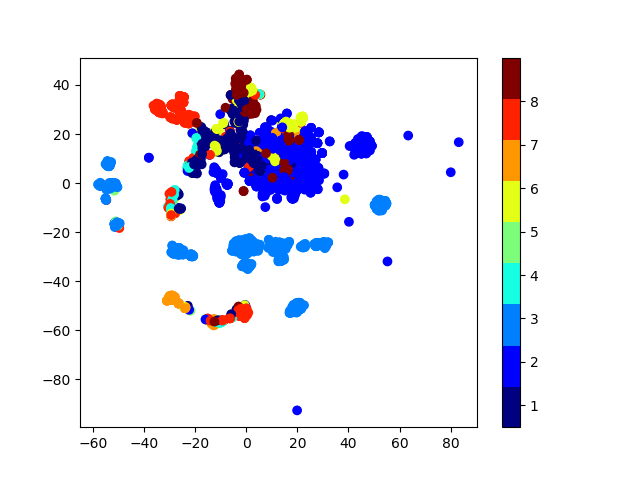

In [241]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(X_train.toarray()[:3000,:])
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_train[:3000], cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.2.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.29686653116304856
log_loss for k =  4 is 0.21455474480769757
log_loss for k =  7 is 0.19947431433725082
log_loss for k =  10 is 0.1894076614035001


<IPython.core.display.Javascript object>


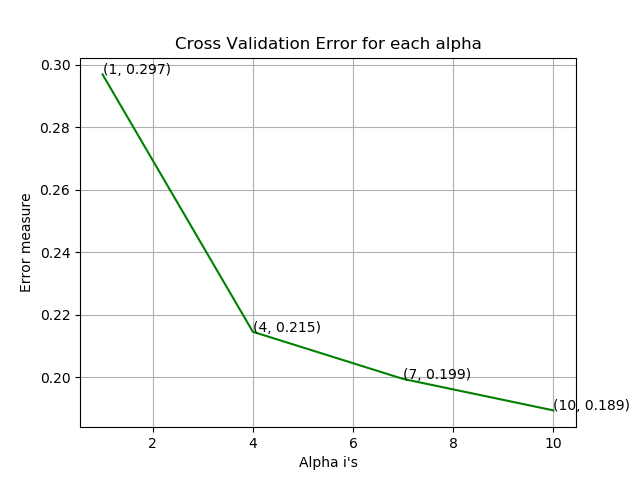

log loss for train data 0.17786697936601087
log loss for cv data 0.1894076614035001
log loss for test data 0.1981150746104821
Number of misclassified points  6.439742410303588
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


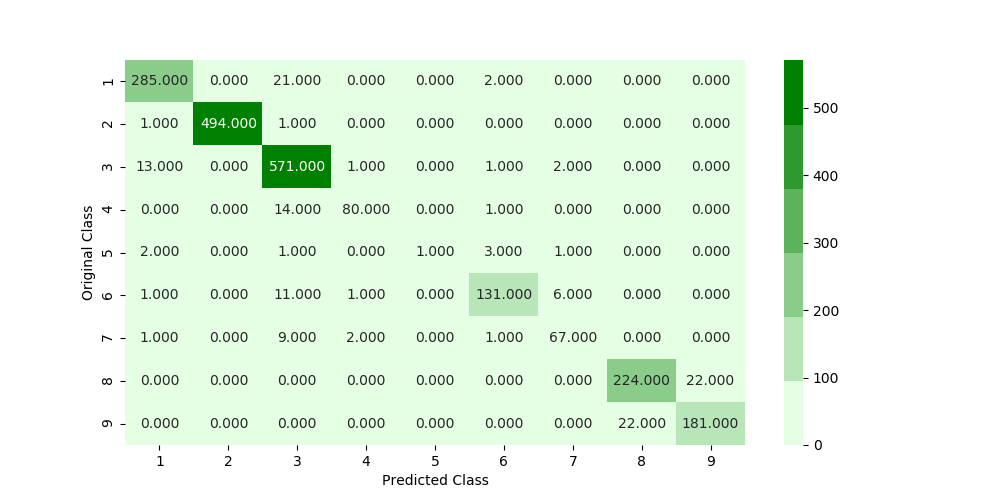

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


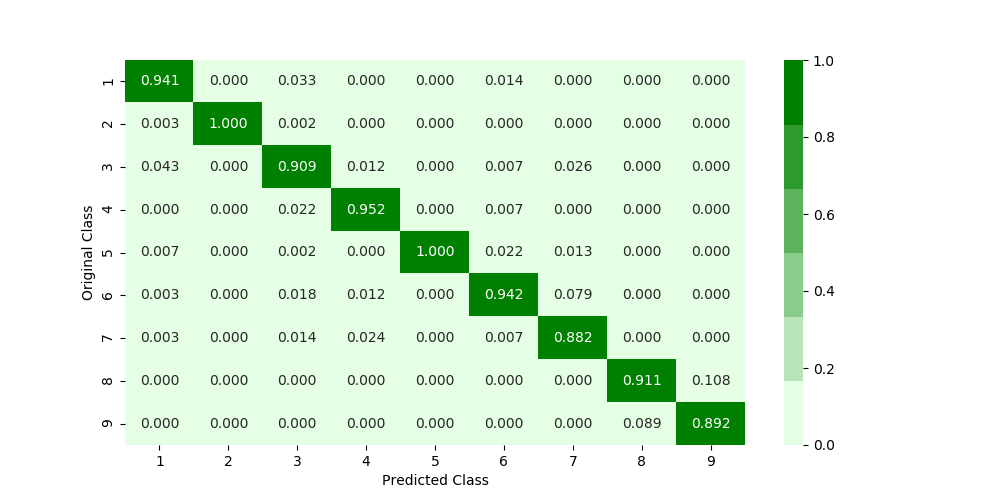

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


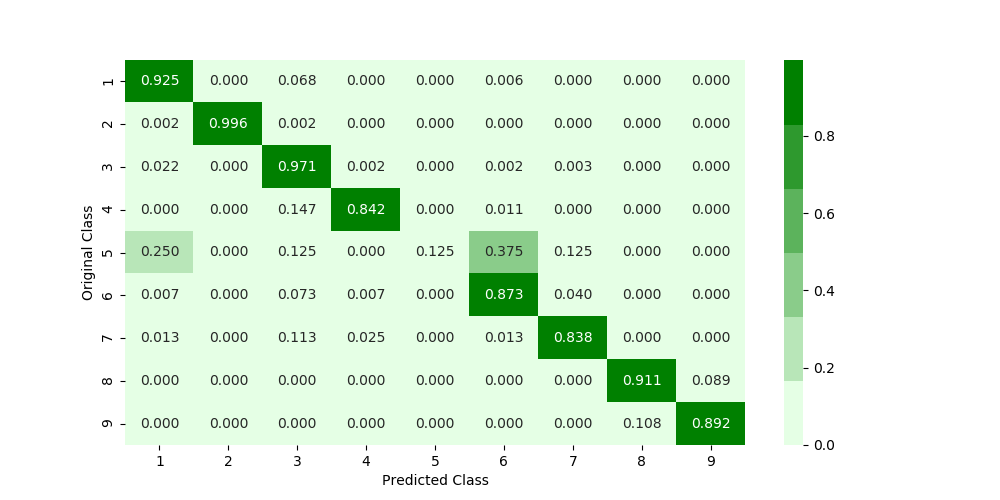

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [195]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1,12 ,3)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    print("Completed for ",i)
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)


predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.2.2 Logistic Regression </h3>

completed for  0.01
completed for  0.1
completed for  1
completed for  10
completed for  100
completed for  1000
log_loss for c =  0.01 is 0.5052269213984524
log_loss for c =  0.1 is 0.23153777015739352
log_loss for c =  1 is 0.07969055871892908
log_loss for c =  10 is 0.05860553396219543
log_loss for c =  100 is 0.055087658360039655
log_loss for c =  1000 is 0.05964616804863618


<IPython.core.display.Javascript object>


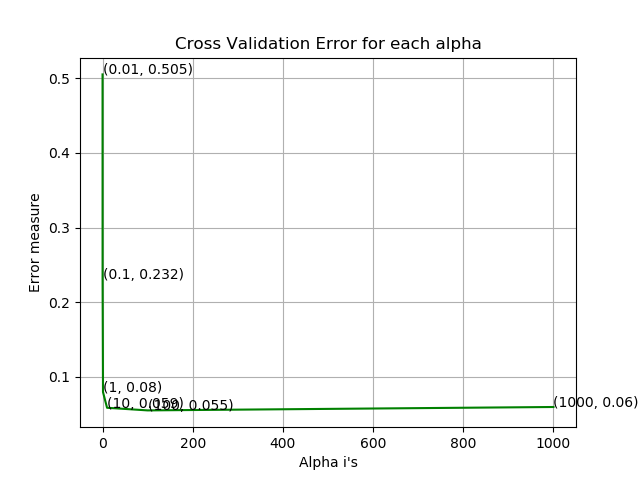

log loss for train data 0.040746286205954316
log loss for cv data 0.055087658360039655
log loss for test data 0.060906044215613
Number of misclassified points  1.0579576816927323
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


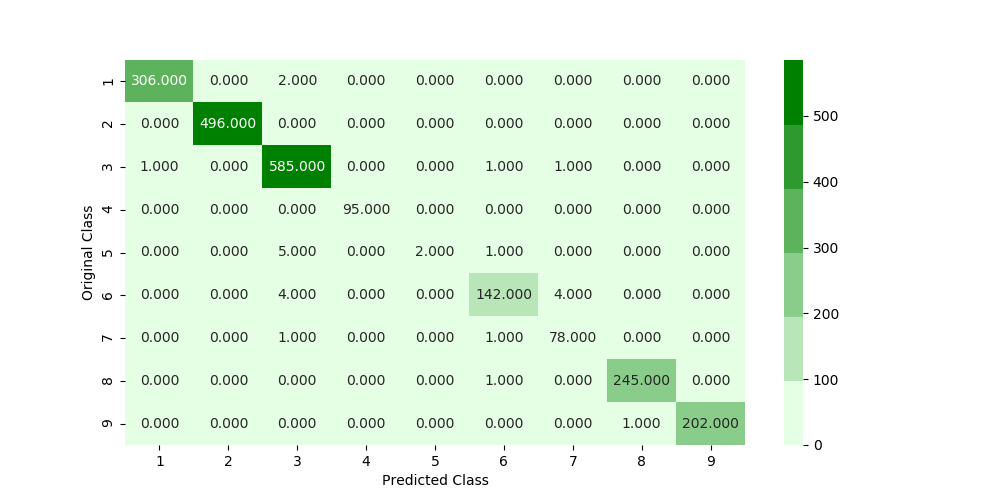

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


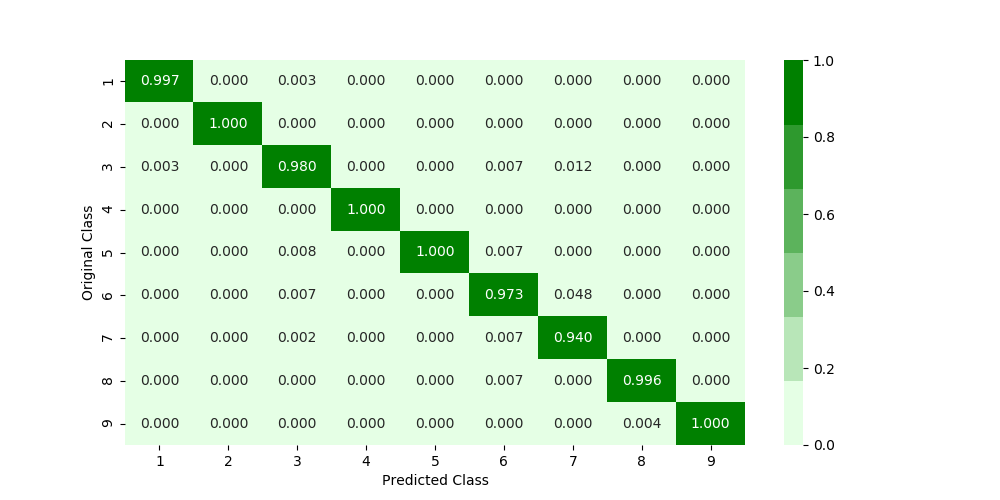

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


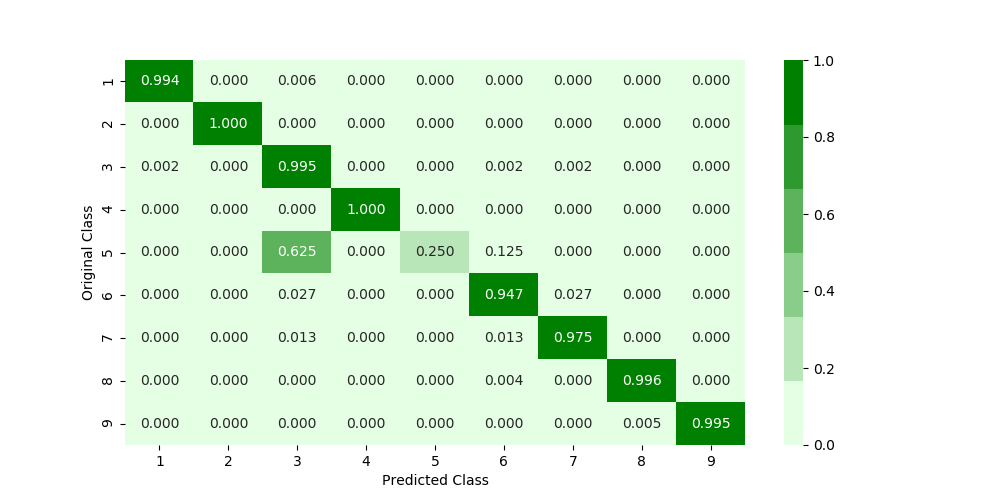

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [196]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
import warnings
warnings.filterwarnings("ignore")

alpha = [10 ** x for x in range(-2, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    print("completed for ",i)
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',(log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',(log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test,sig_clf.predict(X_test))

<h3> 4.2.3 Random Forest Classifier</h3>

Completed for 10
Completed for 30
Completed for 50
Completed for 100
Completed for 150
Completed for 200
Completed for 500
log_loss for c =  10 is 0.039308197772810374
log_loss for c =  30 is 0.02941445173622655
log_loss for c =  50 is 0.027017636227775085
log_loss for c =  100 is 0.027741480047842763
log_loss for c =  150 is 0.027865178531014778
log_loss for c =  200 is 0.028269086655383396
log_loss for c =  500 is 0.02799919033795881
Best alpha is  50


<IPython.core.display.Javascript object>

log loss for train data 0.010336400714835794
log loss for cv data 0.027017636227775085
log loss for test data 0.02688321014317417
Number of misclassified points  0.5519779208831647
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


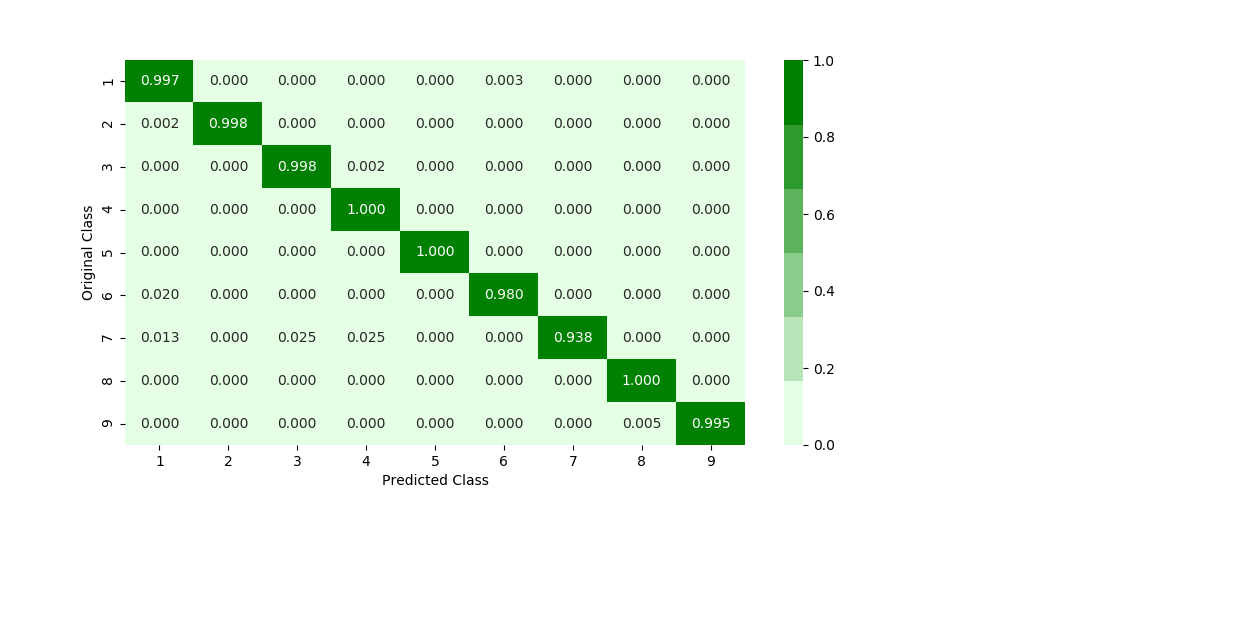

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [92]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,30,50,100,150,200,500]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))
    print("Completed for",i)

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)
print("Best alpha is ",alpha[best_alpha])

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',(log_loss(y_train, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',(log_loss(y_cv, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',(log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test,sig_clf.predict(X_test))

<h3> 4.2.4 XgBoost Classifier</h3>

completed for  50
completed for  100
completed for  150
completed for  200
completed for  500
completed for  700
log_loss for c =  50 is 0.010203361974484853
log_loss for c =  100 is 0.008245367359307728
log_loss for c =  150 is 0.008485361591576262
log_loss for c =  200 is 0.008508816337323406
log_loss for c =  500 is 0.008521364447693454
log_loss for c =  700 is 0.008520828614504698


<IPython.core.display.Javascript object>


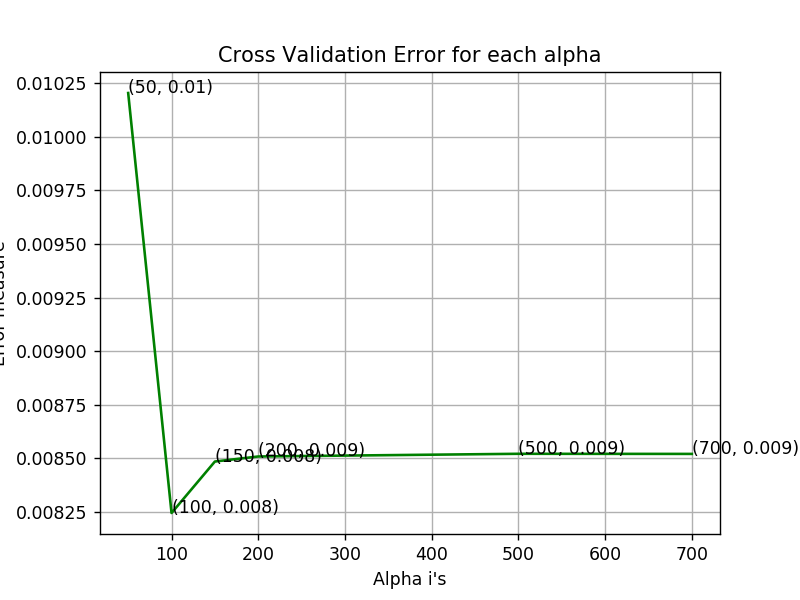

For values of best alpha =  100 The train log loss is: 0.004761678466896418
For values of best alpha =  100 The cross validation log loss is: 0.008245367359307728
For values of best alpha =  100 The test log loss is: 0.005689153865374369
Number of misclassified points  0.045998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


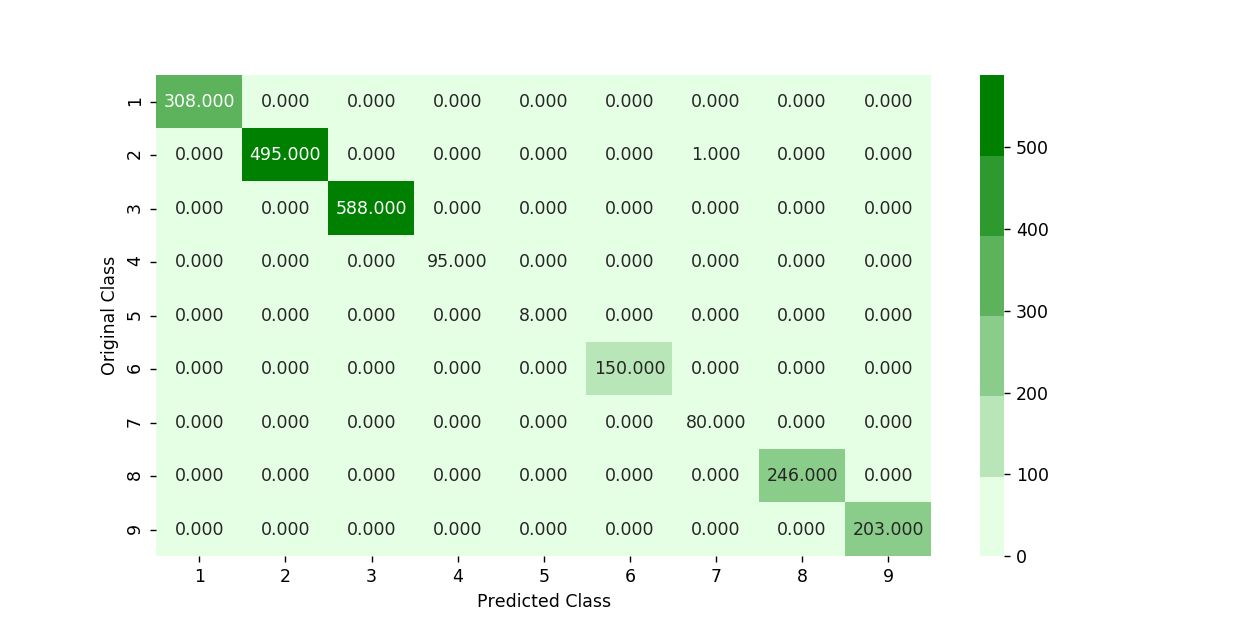

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


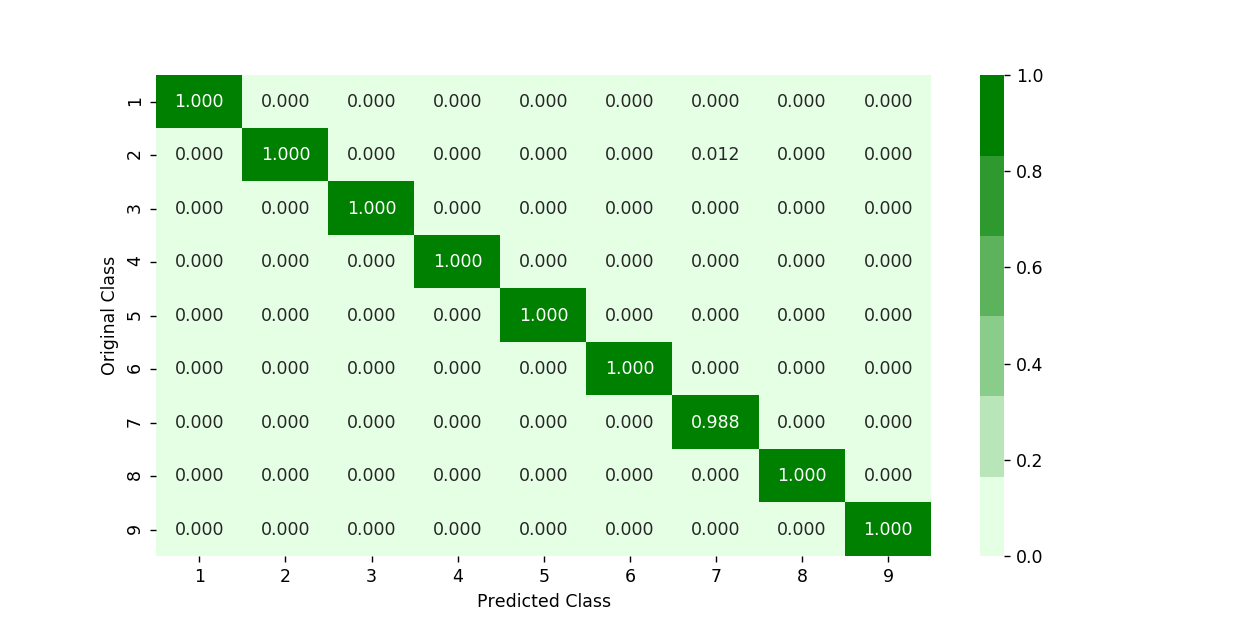

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


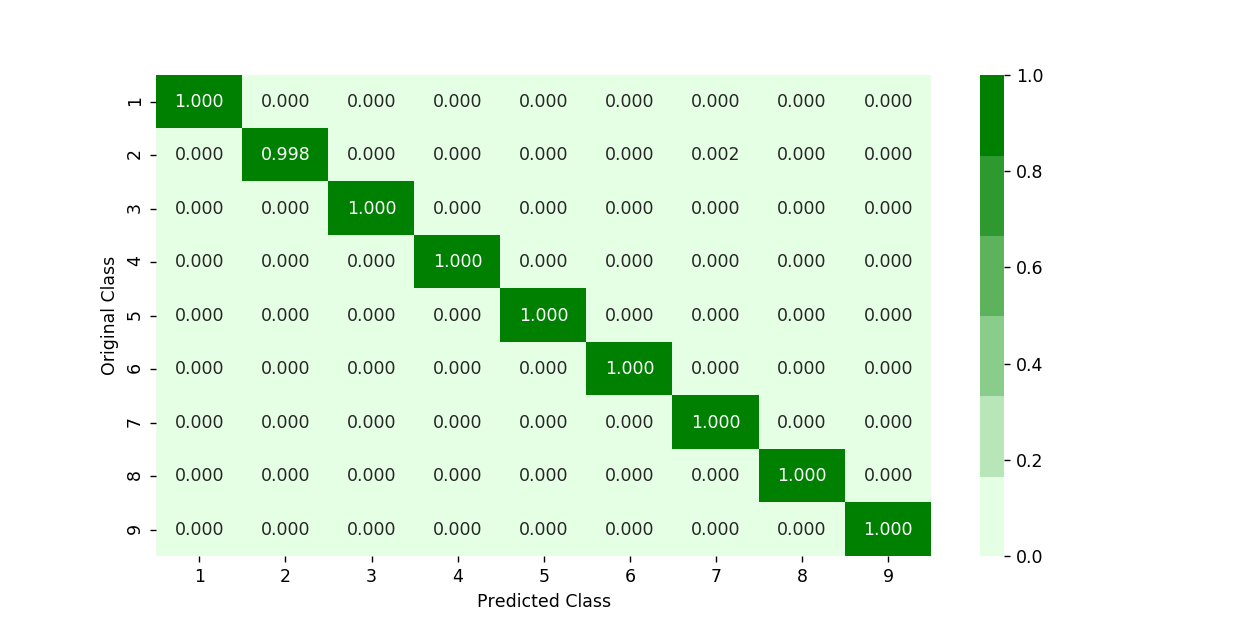

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [94]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[50,100,150,200,500,700]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print("completed for ",i)

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test,sig_clf.predict(X_test))

<h3> 4.2.5 Xgboost Classifier with best hyperparameters</h3>

In [97]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.05,0.1,0.15],
     'n_estimators':[50,70,100,150],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,n_iter=5)
random_cfl.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.8min remaining: 11.6min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  5.0min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  5.4min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  6.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  7.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15], 'n_estimators': [50, 70, 100, 150], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [98]:
print (random_cfl.best_params_)

{'n_estimators': 70, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [99]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=70,subsample=0.5,learning_rate=0.1,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.005161948813069006
cv loss 0.014810505219970637
test loss 0.008096421560680493


<h2> 4.3. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.3.1. Merging both asm and byte file features</h3>

In [197]:
final.head()

0       1     2     3     4     5     6     7     8     9  ...    f9  \
0   2705  274425  1269  1029  1469  1227  1144  1437  1263  1174  ...  3101   
1  13456   21075   752    73    48   175    12    10    11    42  ...   439   
2   2835   16798   596   159   144   513   595   557   146   528  ...  2242   
3  15310   10417   225    61    69   114    40    25    22    63  ...   485   
4   9091   16271    62    22   126     9    11     3     5    11  ...   350   

     fa    fb    fc    fd     fe     ff     ??      size  Class  
0  3211  3097  2758  3099   2759   5753   1824  4.234863      9  
1   281   302  7639   518  17001  54902   8588  5.538818      2  
2  2885  2863  2471  2786   2680  49144    468  3.887939      9  
3   462   516  1133   471    761   7998  13940  0.574219      1  
4   209   239   653   221    242   2199   9008  0.370850      8  

[5 rows x 65796 columns]

In [201]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 51 columns]

In [202]:
print(final.shape)
print(result_asm.shape)

(10868, 65796)
(10868, 51)


**Adding image feature to Bytes.**

In [203]:
# adding image feature
with open("bytes_img_feature.pkl","rb") as f:
    bytes_img_feature = load(f)
    
bytes_img = [bytes_img_feature[id] for id  in final["ID"].values]

bytes_img = np.array(bytes_img)

In [206]:
bytes_img.shape

(10868, 1000)

In [214]:
result_x = scipy.sparse.hstack((final_asm,bytes_img,final.iloc[:,-256:].values))
result_y = final["Class"]

<h3> 4.3.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


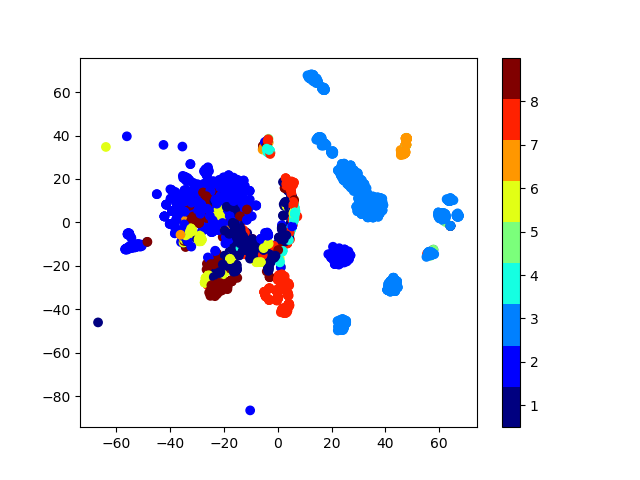

In [219]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x.toarray()[:3000,:])
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y[:3000], cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.3.3. Train and Test split</h3>

In [220]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.3.4. Random Forest Classifier on final features</h3>

Completed for  50
Completed for  100
Completed for  250
Completed for  500
Completed for  700
log_loss for c =  50 is 0.04108648033451638
log_loss for c =  100 is 0.04106261826873782
log_loss for c =  250 is 0.04228014863967434
log_loss for c =  500 is 0.040301542768939415
log_loss for c =  700 is 0.040828518484468355
Best alpha found  500


<IPython.core.display.Javascript object>


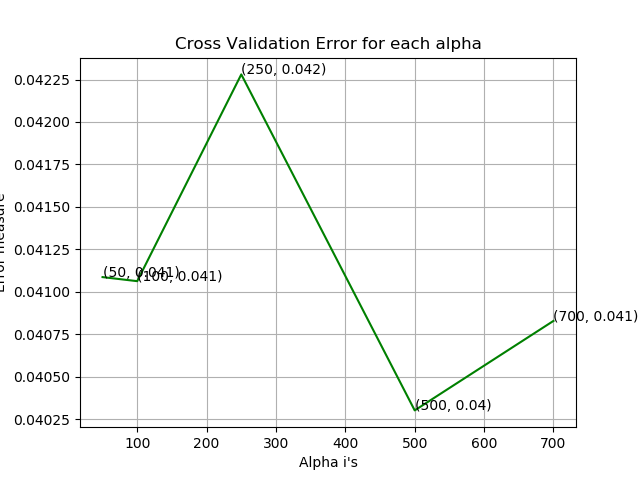

For values of best alpha =  500 The train log loss is: 0.016533021768313352
For values of best alpha =  500 The cross validation log loss is: 0.040301542768939415
For values of best alpha =  500 The test log loss is: 0.032184705767373645


In [222]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[50,100,250,500,700]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))
    print("Completed for ",i)

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)
print("Best alpha found ",alpha[best_alpha])

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.3.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [225]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.05,0.1,0.15],
     'n_estimators':[100,200,500],
     'max_depth':[3,5,10]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,n_iter=5)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 12.4min remaining: 80.4min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 23.7min remaining: 65.1min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 24.4min remaining: 36.6min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 37.5min remaining: 32.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 38.3min remaining: 19.1min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 47.8min remaining: 11.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 54.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15], 'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [226]:
print (random_cfl.best_params_)

{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}


For values of best alpha =  300 The train log loss is: 0.0045496763497752035
For values of best alpha =  300 The cross validation log loss is: 0.007011232767968257
For values of best alpha =  300 The test log loss is: 0.006153990012030606
Number of misclassified points  0.045998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


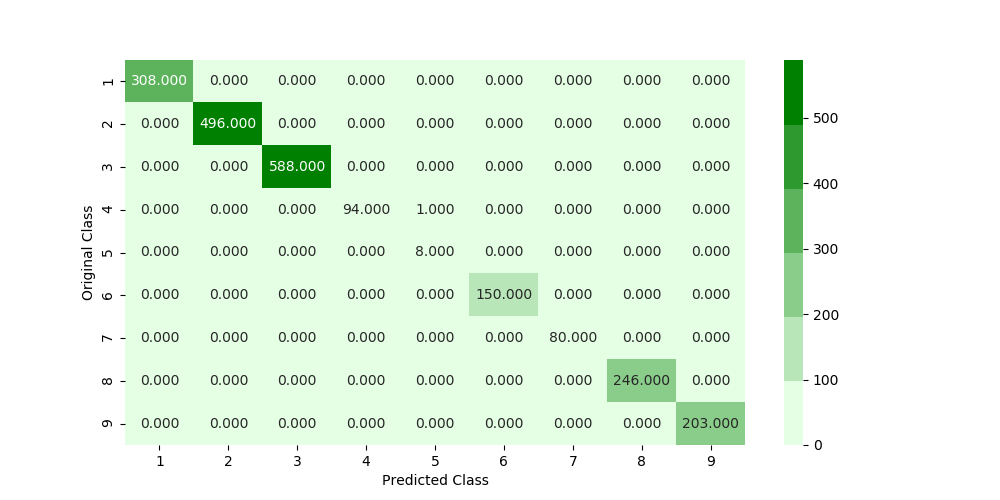

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


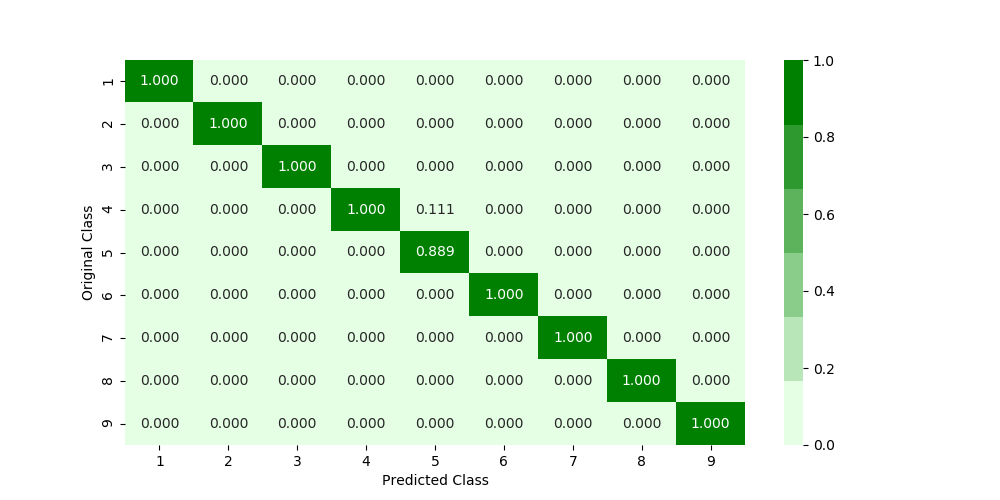

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


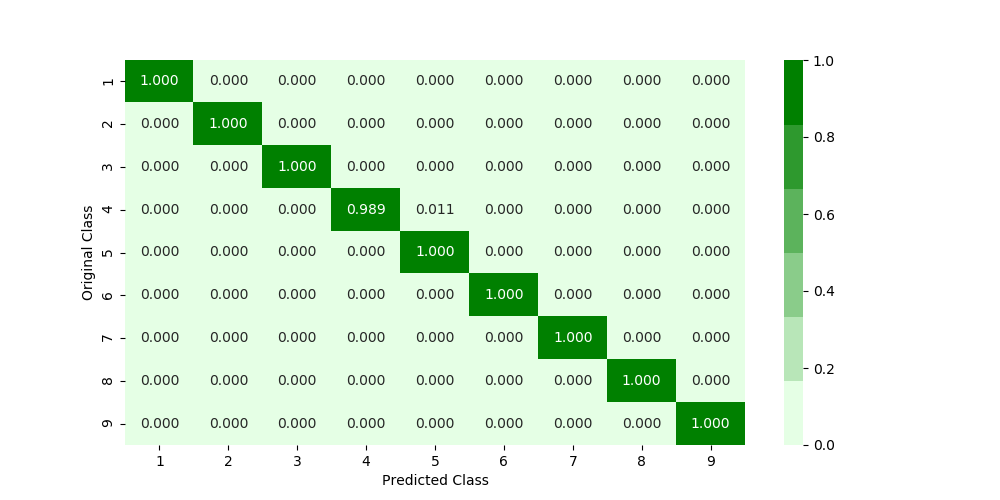

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [231]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,max_depth=3,learning_rate=0.05,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h1> Conclusions </h1>
====================

* asm image feature found to be the best
* XGBOOST took the most of the time to run as compared to other models
* Out of  65k features, **2000** features of bigram byte file preserved almost **99% of variance**.
* Best log loss was obtained in case of XGBOOST in every case
* Best log loss for cv obtained is 0.004
* Best result was found in case of merge feature of both asm and bytes file using **XGBOOST**

<h1> Summary </h1>

In [232]:
from prettytable import PrettyTable
summary = PrettyTable()

<h3> Bytes Feature </h3>

In [233]:
summary.field_names = ["Model", "Feature","Train","CV","Test"]

In [234]:
summary.add_row(["KNN","unigram + bi-gram",0.182,0.295,0.301])
summary.add_row(["Logistic Regresion","unigram + bi-gram",0.13,0.56,0.612])
summary.add_row(["Random Forest","unigram + bi-gram",0.031,0.08,0.08])
summary.add_row(["XGBOOST","unigram + bi-gram",0.023,0.068,0.01])

In [235]:
print(summary)

+--------------------+-------------------+-------+-------+-------+
|       Model        |      Feature      | Train |   CV  |  Test |
+--------------------+-------------------+-------+-------+-------+
|        KNN         | unigram + bi-gram | 0.182 | 0.295 | 0.301 |
| Logistic Regresion | unigram + bi-gram |  0.13 |  0.56 | 0.612 |
|   Random Forest    | unigram + bi-gram | 0.031 |  0.08 |  0.08 |
|      XGBOOST       | unigram + bi-gram | 0.023 | 0.068 |  0.01 |
+--------------------+-------------------+-------+-------+-------+


<h3> Image Feature </h3>

In [236]:
summary = PrettyTable()
summary.field_names = ["Model", "Feature","Train","CV","Test"]

In [237]:
summary.add_row(["KNN","opcodes + Image",0.177,0.189,0.198])
summary.add_row(["Logistic Regresion","opcodes + Image",0.04,0.055,0.060])
summary.add_row(["Random Forest","opcodes + Image",0.0047,0.0082,0.0056])
summary.add_row(["XGBOOST","opcodes + Image",0.0051,0.014,0.0080])

In [238]:
print(summary)

+--------------------+-----------------+--------+--------+--------+
|       Model        |     Feature     | Train  |   CV   |  Test  |
+--------------------+-----------------+--------+--------+--------+
|        KNN         | opcodes + Image | 0.177  | 0.189  | 0.198  |
| Logistic Regresion | opcodes + Image |  0.04  | 0.055  |  0.06  |
|   Random Forest    | opcodes + Image | 0.0047 | 0.0082 | 0.0056 |
|      XGBOOST       | opcodes + Image | 0.0051 | 0.014  | 0.008  |
+--------------------+-----------------+--------+--------+--------+


<h3> Combine Feature </h3>

In [239]:
summary = PrettyTable()
summary.field_names = ["Model", "Feature","Train","CV","Test"]

summary.add_row(["Random Forest","asm_image + bytes_image + bytes_unigram + asm",0.016,0.040,0.032])
summary.add_row(["XGBOOST","asm_image + bytes_image + bytes_unigram + asm",0.0045,0.0070,0.0061])

print(summary)

+---------------+-----------------------------------------------+--------+-------+--------+
|     Model     |                    Feature                    | Train  |   CV  |  Test  |
+---------------+-----------------------------------------------+--------+-------+--------+
| Random Forest | asm_image + bytes_image + bytes_unigram + asm | 0.016  |  0.04 | 0.032  |
|    XGBOOST    | asm_image + bytes_image + bytes_unigram + asm | 0.0045 | 0.007 | 0.0061 |
+---------------+-----------------------------------------------+--------+-------+--------+
